# 스케일링 및 인코딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family = 'Malgun Gothic') # 그래프 글꼴 설정 (window)


In [2]:
df1 = pd.read_csv('10_Data.csv', encoding='cp949')
df1.head()

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40


In [3]:
# 결측값을 제거 한 뒤 스케일링 실시
df1_clean = df1.dropna()

# 데이터의 연속형 항목을 리스트 형태로 불러옴
numeric_list = df1_clean.describe().columns.to_list()
df1_numeric = df1_clean[numeric_list]   # 연속형 데이터 만 추출

In [4]:
# 스케일 & 인코딩
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [5]:
df1_numeric.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000
mean,8.573486,71.685658,101.377923,136.969046,23.727427,208.354819,75.685222
std,7.377341,0.857357,12.486747,12.480757,0.232014,3.622778,2.695066
min,1.000000,68.217193,65.050311,100.058961,22.919000,194.239000,69.690000
25%,3.000000,71.181829,91.825021,127.329544,23.581000,205.912000,73.420000
50%,6.000000,71.728887,99.786348,135.491005,23.728000,208.361000,75.670000
75%,12.000000,72.251039,109.162083,144.771468,23.864000,210.788000,77.950000
max,62.000000,74.086660,140.799501,176.823600,24.580000,223.702000,82.580000


In [6]:
# 스케일링 실시
scaler = StandardScaler()
scaler.fit(df1_numeric)     # fit 데이터를 변환하기 위한 수식을 도출

StandardScaler()

In [7]:
# 변환
df1_scale = pd.DataFrame(scaler.fit_transform(df1_numeric), columns=numeric_list)
df1_scale.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,2.290900e+04,2.290900e+04,2.290900e+04,2.290900e+04,2.290900e+04,2.290900e+04,2.290900e+04
mean,1.389511e-16,-1.153015e-14,-4.536072e-16,8.810060e-16,-1.654387e-15,1.509233e-15,-1.941129e-15
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.026610e+00,-4.045619e+00,-2.909357e+00,-2.957424e+00,-3.484461e+00,-3.896493e+00,-2.224566e+00
25%,-7.555037e-01,-5.876663e-01,-7.650600e-01,-7.723661e-01,-6.311269e-01,-6.743092e-01,-8.405254e-01
50%,-3.488442e-01,5.042214e-02,-1.274639e-01,-1.184282e-01,2.468439e-03,1.706168e-03,-5.648210e-03
75%,4.644747e-01,6.594608e-01,6.234074e-01,6.251698e-01,5.886519e-01,6.716487e-01,8.403607e-01
max,7.242132e+00,2.800530e+00,3.157142e+00,3.193350e+00,3.674735e+00,4.236395e+00,2.558352e+00


In [8]:
# 충전실 온도를 표준정규분포로 변환하여 
# 변환 결과에서 충전실 온도가 0이하인 데이터 개수를 확인
print(len(df1_scale.loc[df1_scale['충전실온도']<0]['충전실온도']))

10943


In [9]:
# MinMax 스케일링 실시
scaler = MinMaxScaler()
scaler.fit(df1_numeric)
df1_scale = pd.DataFrame(scaler.fit_transform(df1_numeric), columns=numeric_list)
df1_scale.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000
mean,0.124156,0.590934,0.479578,0.480821,0.486711,0.479103,0.465106
std,0.120940,0.146071,0.164843,0.162585,0.139684,0.122960,0.209082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032787,0.505095,0.353465,0.355249,0.398555,0.396192,0.289372
50%,0.081967,0.598299,0.458566,0.461567,0.487056,0.479313,0.463926
75%,0.180328,0.687259,0.582340,0.582462,0.568934,0.561688,0.640807
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# 인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
df1_clean['생산라인명'].unique()    # 범주형 데이터의 항목을 확인

array(['쿠커 #1', '쿠커 #2', '쿠커 #3', '2동 쿠커 #4', '프리머 #1', 'PET병',
       '파일롯 - 수동', '벌크(캔)', '마요네즈 수동', 'PET#1', '로타리 #2', '2동 쿠커 #3',
       '3K 캔', '3.2마요', '튜브', '2동 오리히로', '파일롯', '2동 6열컵실러#1', '파일롯(#B)',
       '로타리 #1', '파우치포장(#2)', '3.2K마요포장(#5)', '쿠커 #4', '프리머 #2', '전처리1실',
       '전처리2실', '2동 컵(샐러드)포장(#7)', '튜브포장(#6)', '계량 #1', '분말포장(#8)',
       '계량 #2', '계량 #4 (소량)', '파일롯 - 소포장', '파우치포장(#3)', '계량 #3',
       '2동 로타리#3', '파일롯 - 벌크', '2동 쿠커 #1', '쿠커 #5', '병(PET)12열충전',
       'PET#2', '세트포장(#A)', '2동 쿠커 #2', '2동 로타리#4', '냉동밥 취반#1', '로타리 #5',
       '냉동밥 내포장#2', '냉동밥 내포장#1', '냉동밥 외포장#2', '냉동밥 외포장#1', '볶음 공정',
       '냉동밥 취반#2', '2동 6열컵실러#2', '2동 4열충진기', '2동 쿠커 #5', '벌크(#9)',
       '2동 전처리실'], dtype=object)

In [13]:
object_list = df1_clean['생산라인명'].unique().tolist()   # 범주형 항목들만 리스트 형태로 추출
len(object_list)

57

In [14]:
number_list = list(range(0, 57))

In [15]:
dict_trasform = dict(zip(object_list, number_list))
dict_trasform

{'쿠커 #1': 0,
 '쿠커 #2': 1,
 '쿠커 #3': 2,
 '2동 쿠커 #4': 3,
 '프리머 #1': 4,
 'PET병': 5,
 '파일롯 - 수동': 6,
 '벌크(캔)': 7,
 '마요네즈 수동': 8,
 'PET#1': 9,
 '로타리 #2': 10,
 '2동 쿠커 #3': 11,
 '3K 캔': 12,
 '3.2마요': 13,
 '튜브': 14,
 '2동 오리히로': 15,
 '파일롯': 16,
 '2동 6열컵실러#1': 17,
 '파일롯(#B)': 18,
 '로타리 #1': 19,
 '파우치포장(#2)': 20,
 '3.2K마요포장(#5)': 21,
 '쿠커 #4': 22,
 '프리머 #2': 23,
 '전처리1실': 24,
 '전처리2실': 25,
 '2동 컵(샐러드)포장(#7)': 26,
 '튜브포장(#6)': 27,
 '계량 #1': 28,
 '분말포장(#8)': 29,
 '계량 #2': 30,
 '계량 #4 (소량)': 31,
 '파일롯 - 소포장': 32,
 '파우치포장(#3)': 33,
 '계량 #3': 34,
 '2동 로타리#3': 35,
 '파일롯 - 벌크': 36,
 '2동 쿠커 #1': 37,
 '쿠커 #5': 38,
 '병(PET)12열충전': 39,
 'PET#2': 40,
 '세트포장(#A)': 41,
 '2동 쿠커 #2': 42,
 '2동 로타리#4': 43,
 '냉동밥 취반#1': 44,
 '로타리 #5': 45,
 '냉동밥 내포장#2': 46,
 '냉동밥 내포장#1': 47,
 '냉동밥 외포장#2': 48,
 '냉동밥 외포장#1': 49,
 '볶음 공정': 50,
 '냉동밥 취반#2': 51,
 '2동 6열컵실러#2': 52,
 '2동 4열충진기': 53,
 '2동 쿠커 #5': 54,
 '벌크(#9)': 55,
 '2동 전처리실': 56}

In [16]:
df1_clean['생산라인명'].replace(dict_trasform)

0         0
1         1
2         2
3         3
4         4
         ..
24059    46
24062    47
24063    47
24067    47
24068    33
Name: 생산라인명, Length: 22909, dtype: int64

In [17]:
# Sklearn 라이브러리로 변환
encoder = LabelEncoder()
encoder.fit(df1_clean[['생산라인명']])
encoder.fit_transform(df1_clean[['생산라인명']])

c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([41, 42, 43, ..., 23, 23, 49])

In [18]:
# Pandas OneHotEncoding
pd.get_dummies(df1_clean)

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산라인코드_C001,생산라인코드_C002,생산라인코드_C003,...,품목명_흑참깨드레싱E,품목명_흑참깨드레싱E(재),품목명_흑초차베이스,품목명_흑초차베이스(재),품목명_흰쌀베이스밥,작업장코드_W002,작업장코드_W003,작업장코드_W005,작업장코드_W007,작업장코드_W012
0,3,71.669853,96.769853,131.742003,23.315,201.844,70.37,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,70.386480,102.086480,136.926080,23.226,212.043,70.83,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,13,71.206130,112.306130,147.579680,23.516,208.781,73.55,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7,70.430565,96.030565,131.569165,23.692,208.269,74.81,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,72.179319,114.079318,149.928068,23.899,211.625,73.40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24059,3,71.288798,102.688798,138.091898,23.602,206.561,72.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24062,9,69.732381,98.432381,133.916831,23.656,213.413,76.63,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24063,10,71.459932,107.559932,143.598182,24.026,215.243,81.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24067,4,70.664452,65.764452,100.773102,23.339,209.513,72.12,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# 결측값을 대치
from sklearn.impute import SimpleImputer    
# 단순대치 : 평균/중앙값/최빈값 특정 값으로 대치
df1.isnull().sum()

순번           0
생산라인코드       0
생산라인명        0
생산일자         0
품목코드        38
품목명         57
작업장코드        0
충전실온도        0
실링온도        28
쿠킹온도        28
쿠킹스팀압력       0
실링압력         0
생산시간      1078
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df1[['생산시간','실링온도','쿠킹온도']])

SimpleImputer(strategy='median')

In [21]:
df1_clean2 = pd.DataFrame(imputer.fit_transform(df1[['생산시간','실링온도','쿠킹온도']]))
df1_clean2.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [22]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be set t

# 특성공학 + 학습 수행

In [23]:
df1 = pd.read_csv('01_Data.csv')
df1.head()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합


In [24]:
df1[['State']].value_counts()   # 데이터의 항목과 빈도수 확인

State
계약확정     50620
해약확정       622
기간만료        45
해약진행중       14
dtype: int64

In [25]:
df1['Target'] = df1['State'].replace({'계약확정':0, '기간만료':0, '해약확정':1, '해약진행중':1})

In [26]:
df1.columns

Index(['Index', 'Member_ID', 'Sales_Type', 'Contract_Type', 'Channel',
       'Datetime', 'Term', 'Payment_Type', 'Product_Type', 'Amount_Month',
       'Customer_Type', 'Age', 'Address1', 'Address2', 'State',
       'Overdue_count', 'Overdue_Type', 'Gender', 'Credit_Rank', 'Bank',
       'Target'],
      dtype='object')

In [27]:
X = df1[['Sales_Type', 'Channel', 'Term', 'Amount_Month', 'Age', 'Credit_Rank']]
Y = df1['Target']   # 해약 여부

In [28]:
# 학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=1234)

In [29]:
# 파이프라인 구축 (특성공학 + 학습)
from sklearn.pipeline import make_pipeline
# 결측치 처리 (숫자->중앙값 / 문자->최빈값)
from sklearn.impute import SimpleImputer
# 스케일링과 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
# 숫자는 숫자끼리 문자는 문자끼리 처리가 될 수 있도록 파이프를 별도로 구성
# 두 파이프를 병합
from sklearn.compose import make_column_transformer
# 학습알고리즘 호출
from sklearn.tree import DecisionTreeClassifier

In [30]:
# 숫자가 처리되는 Process 구축 (1. 중앙값으로 결측 처리 -> 2. 스케일링 수행)
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'),
                            MinMaxScaler())
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [31]:
# 문자가 처리되는 Process 구출 (1. 최빈값으로 결측 처리 -> 2. 인코딩)
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder())
category_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder())])

In [32]:
# 숫자는 숫자끼리 문자는 문자끼리 처리가 되도록 파이프를 구성
numeric_list = X.describe().columns.to_list()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            ,(category_pipe, category_list))
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Term', 'Amount_Month', 'Age',
                                  'Credit_Rank']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Sales_Type', 'Channel'])])

In [33]:
# 특성 공학 + 학습
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeClassifier())
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Term', 'Amount_Month',
                                                   'Age', 'Credit_Rank']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sales_Type', 'Channel'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [34]:
# 평가
from sklearn.metrics import classification_report

In [35]:
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [36]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35455
           1       0.96      0.18      0.30       455

    accuracy                           0.99     35910
   macro avg       0.98      0.59      0.65     35910
weighted avg       0.99      0.99      0.99     35910



In [37]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15210
           1       0.08      0.02      0.03       181

    accuracy                           0.99     15391
   macro avg       0.53      0.51      0.51     15391
weighted avg       0.98      0.99      0.98     15391



In [38]:
# 적용
x1 = input('계약 유형을 입력하시오 : ')     # 렌탈
x2 = input('유입 경로를 입력하시오 : ')     # 영업방판
x3 = input('계약 기간을 입력하시오 : ')     # 12
x4 = input('월 납부액을 입력하시오 : ')     # 100000
x5 = input('고객의 연령 입력하시오 : ')     # 30
x6 = input('신용 등급을 입력하시오 : ')     # 1
input_data = pd.DataFrame([[x1,x2,x3,x4,x5,x6]], columns=X.columns.tolist())

In [39]:
model_pipe.predict(input_data)

array([0], dtype=int64)

In [40]:
# 모델 저장
import pickle   # Python 객체들을 하나의 파일로 변환

In [41]:
pickle.dump(model_pipe, open('model.sav','wb'))

# 교차검증을 적용한 학습

In [42]:
# GridSearch : 하이퍼 파라미터 튜닝
# CV (Cross Validation)
from sklearn.model_selection import GridSearchCV

In [43]:
grid_model = GridSearchCV(model_pipe
                        , cv=5
                        , param_grid = {'decisiontreeclassifier__max_depth' : range(1, 11)
                                        , 'decisiontreeclassifier__min_samples_leaf' : range(1, 11)}
                        , scoring='f1'
                        , n_jobs = -1)  # n_jobs에 -1은 cpu의 스레드를 모두 사용하겠다는 의미이다.
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'Amount_Month',
                                                                          'Age',
                                                                          'Credit_Rank']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sales_Type',
                                                                          'Channel'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(1, 11),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 11)},
             scoring='f1')

In [44]:
best_model = grid_model.best_estimator_

In [45]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Term', 'Amount_Month',
                                                   'Age', 'Credit_Rank']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sales_Type', 'Channel'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10))])

In [170]:
pickle.dump(best_model, open('best_model.sav','wb'))

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 평가
from sklearn.metrics import classification_report
import scipy.stats as stats
import pickle   # Python 객체들을 하나의 파일로 변환
# GridSearch : 하이퍼 파라미터 튜닝
# CV (Cross Validation)
from sklearn.model_selection import GridSearchCV

mpl.rc('font', family = 'Malgun Gothic') # 그래프 글꼴 설정 (window)


# Mission8
- 01_Data.csv 파일을 가져와 df1으로 선언한 뒤 아래의 문제를 해결하시오
1. 'Amount_Month'(월랜탈비용)과 'Term'(계약기간)데이터를 곱하여, 계약기간동안 한명의 회원이 총 납부하는 총금액('Total_Amount')항목을 계산하여 새로운 변수로 선언
2. 총금액('Total_Amount')값에 따라 고객의 등급을 분류해보고자 한다. 
    - 총금액('Total_Amount')값이 상위 10% 고객은 'VIP'
    - 총금액('Total_Amount')값이 상위 30% 고객은 'Special'
    - 나머지 고객 'Normal' 값으로 계산하여 'Member_Rank' 변수를 생성
3. 앞서 계산된 'Member_Rank'에서 'VIP'고객들의 특성을 파악하고자 한다.
    - 'VIP'고객들만 추출하여, 'Channel'(유입경로)에 따른 'Total_Amount'(총금액)의 평균을 시각화 / 합 시각화
4. 'VIP'고객들의 'Channel'(유입경로)에서 Total_Amount값의 합이 가장 높은 상위 3개의 경로를 선택하여, 각 경로 별 Total_Amount값의 평균의 유의미한 차이가 있는지 가설검정 수행
5. 'Member_Rank'고객의 등급에 따라 사용하는 'Product_Type'제품군이 달라지는 지 확인해보고자 한다.
    - 고객의 등급과 제품군의 빈도수를 나타내는 그래프를 시각화
    - 고객의 등급과 제품군 간의 연관성이 있는지 가설검정을 수행
6. 'Member_Rank'고객 등급에서 'Special' 고객들의 특성을 파악하고자 한다.
    - 'Datetime'계약일자를 이용하여, 가장 유입(빈도수)이 많이 발생한 '월'을 확인
    - 2019년도 / 2020년도 각각 확인
7. 'Product_Type' 제품군 별 연도에 따른 'Total_Amount' 총금액의 증감율을 계산하시오
8. Credit_Rank'신용등급'을 예측하는 회귀모델을 만들고자 한다.
    (아래의 조건에 맞춰 회귀모델을 구성하시오)
    - X : Age / Amount_Month / Term / Gender / Product_Type
    - Y : Credit_Rank
    - 숫자 데이터 : 결측처리 + Standard Scaling
    - 문자 데이터 : 결측처리 + One Hot Encoding
    - 교차 검증 3회 / DecisonTreeRegressor / param_grid = {}
    - r2_score(from sklearn.metrics import r2_score)
    - r2_score(Y_train, Y_train_pred) / r2_score(Y_test, Y_test_pred)
9. 'Product_Type'별 계약건수 대비 총금액(Total_Amount)을 나눈 값을 계산하시오

In [91]:
df1 = pd.read_csv('01_Data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          51301 non-null  int64  
 1   Member_ID      51301 non-null  int64  
 2   Sales_Type     51301 non-null  object 
 3   Contract_Type  51301 non-null  object 
 4   Channel        51301 non-null  object 
 5   Datetime       51301 non-null  object 
 6   Term           51301 non-null  int64  
 7   Payment_Type   51301 non-null  object 
 8   Product_Type   51301 non-null  object 
 9   Amount_Month   51301 non-null  int64  
 10  Customer_Type  51299 non-null  object 
 11  Age            44329 non-null  float64
 12  Address1       51299 non-null  object 
 13  Address2       51299 non-null  object 
 14  State          51301 non-null  object 
 15  Overdue_count  51301 non-null  int64  
 16  Overdue_Type   51301 non-null  object 
 17  Gender         51301 non-null  object 
 18  Credit

## 1번

In [93]:
# 1. 'Amount_Month'(월랜탈비용)과 'Term'(계약기간)데이터를 곱하여, 
# 계약기간동안 한명의 회원이 총 납부하는 총금액('Total_Amount')항목을 계산하여 새로운 변수로 선언
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
df1['Total_Amount'].describe()


count    5.130100e+04
mean     5.315394e+06
std      1.455794e+06
min      6.624000e+05
25%      4.914000e+06
50%      5.814000e+06
75%      5.814000e+06
max      1.006200e+07
Name: Total_Amount, dtype: float64

## 2번

In [94]:
# 2. 총금액('Total_Amount')값에 따라 고객의 등급을 분류해보고자 한다. 
#     - 총금액('Total_Amount')값이 상위 10% 고객은 'VIP'
#     - 총금액('Total_Amount')값이 상위 30% 고객은 'Special'
#     - 나머지 고객 'Normal' 값으로 계산하여 'Member_Rank' 변수를 생성
df1['Total_Amount']

0        5814000
1        6174000
2        5814000
3         802800
4         802800
          ...   
51296    5814000
51297    5814000
51298    4715100
51299    5814000
51300    5814000
Name: Total_Amount, Length: 51301, dtype: int64

In [95]:
q_1 = df1['Total_Amount'].quantile(.9)
q_3 = df1['Total_Amount'].quantile(.7)

def func1(data) :
    if data >= q_1:
        return 'VIP'
    elif data >= q_3:
        return 'Special'
    else :
        return 'Normal'

df1['Member_Rank'] = df1['Total_Amount'].apply(func1)
df1['Member_Rank'].value_counts()

Special    21145
Normal     20909
VIP         9247
Name: Member_Rank, dtype: int64

## 3번

In [51]:
# 3. 앞서 계산된 'Member_Rank'에서 'VIP'고객들의 특성을 파악하고자 한다.
#     - 'VIP'고객들만 추출하여, 'Channel'(유입경로)에 따른 'Total_Amount'(총금액)의 평균을 시각화 / 합 시각화

In [96]:
cond1 = (df1['Member_Rank'] == 'VIP')
df2 = df1.loc[cond1]
# df2_list = df2['Channel'].unique().tolist()

In [109]:
df3 = df2.pivot_table(index='Channel', values='Total_Amount', aggfunc=['mean','sum']).reset_index()
df3

,Channel,mean,sum
,,Total_Amount,Total_Amount
0,대형마트A,6.657713e+06,6637739400
1,대형마트C,6.534000e+06,52272000
2,대형마트E,6.697143e+06,3100777200
3,대형마트H,6.498000e+06,506844000
4,영업방판,6.731221e+06,43739475300
5,자체홈페이지,6.452250e+06,154854000
6,재계약,6.354000e+06,6354000
7,전단홍보,6.794096e+06,1698524100
8,전문매장H,6.638545e+06,2144250000


In [115]:
df3.columns = df3.columns.droplevel(1)

<AxesSubplot:xlabel='Channel', ylabel='mean'>

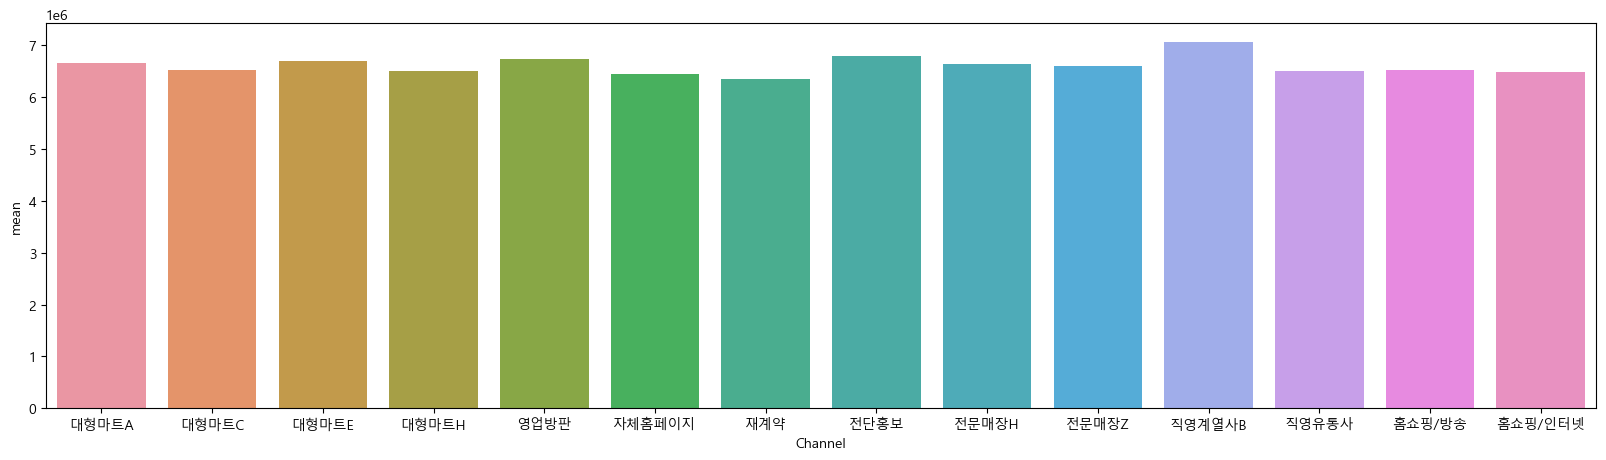

In [116]:
import seaborn as sns
plt.figure(figsize = (20,5))
# plt.xticks(fontsize=20)     # x축 글자 사이즈 조정
# plt.yticks(fontsize=20)     # y축 글자 사이즈 조정
# sns.barplot(data=df3, x = 'Channel', y = ('mean','Total_Amount'))
sns.barplot(data=df3, x = 'Channel', y = 'mean')

<AxesSubplot:xlabel='Channel', ylabel='sum'>

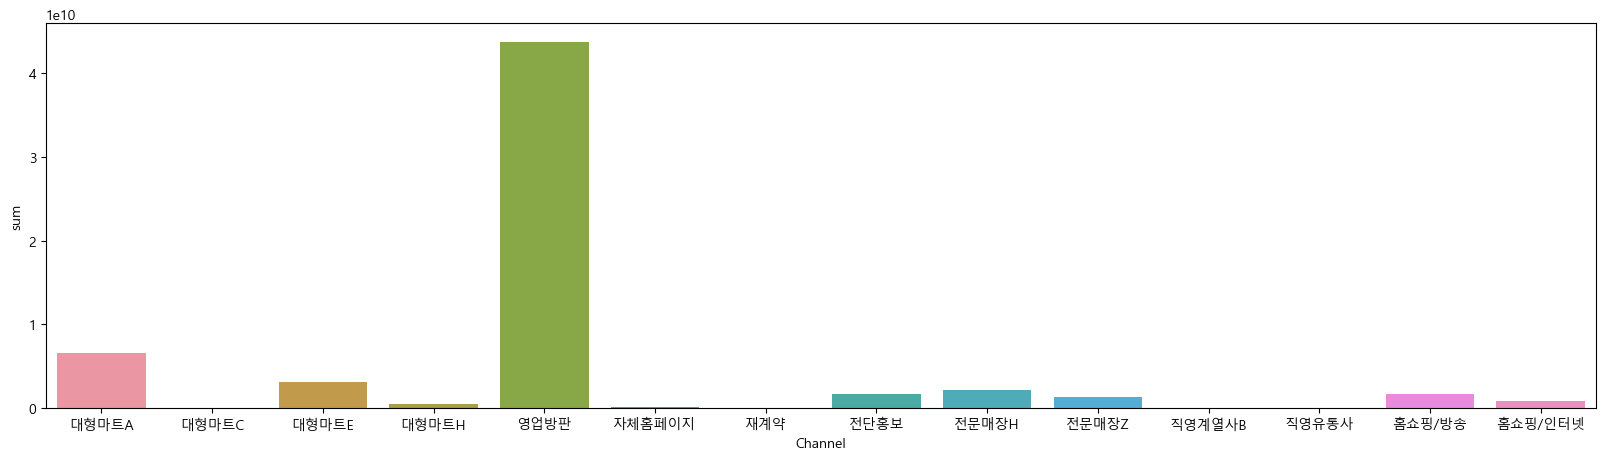

In [117]:
plt.figure(figsize = (20,5))
# sns.barplot(data=df3, x = 'Channel', y = ('sum','Total_Amount'))
sns.barplot(data=df3, x = 'Channel', y = 'sum')

<AxesSubplot:xlabel='value', ylabel='Channel'>

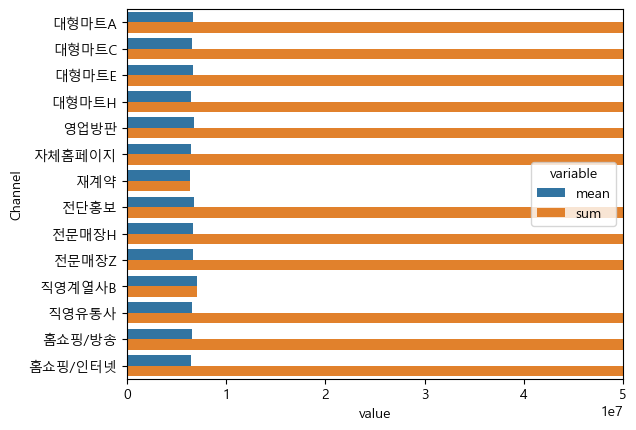

In [120]:
plt.xlim([0, 50000000])
sns.barplot(data = df3.melt(id_vars='Channel'),
                        y = 'Channel', x='value', hue = 'variable')

<AxesSubplot:xlabel='value', ylabel='Channel'>

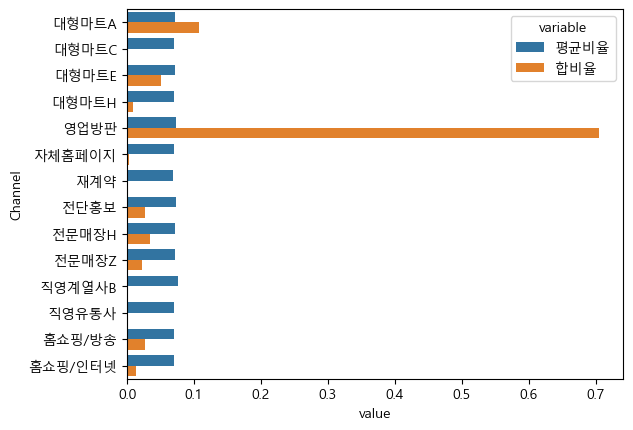

In [121]:
df3['평균비율'] = df3['mean'] / df3['mean'].sum()
df3['합비율'] = df3['sum'] / df3['sum'].sum()

df3_ratio = df3[['Channel', '평균비율', '합비율']].melt(id_vars='Channel')
sns.barplot(data=df3_ratio, y='Channel', x='value', hue='variable')

## 4번

In [122]:
# 4. 'VIP'고객들의 'Channel'(유입경로)에서 Total_Amount값의 합이 가장 높은 상위 3개의 경로를 선택하여, 
# 각 경로 별 Total_Amount값의 평균의 유의미한 차이가 있는지 가설검정 수행

In [123]:
cond1 = (df1['Member_Rank'] == 'VIP')
df1_4 = df1.loc[cond1]
df1_4_list = df1_4.pivot_table(index='Channel', values='Total_Amount', aggfunc='sum').sort_values(by='Total_Amount', ascending=False)[0:3].index.tolist()
df1_4_list

['영업방판', '대형마트A', '대형마트E']

In [129]:
df1_top = df1_4.loc[df1_4['Channel'].isin(df1_4_list)]

In [131]:
# 4-1. Total_Amount 정규성을 갖는가?
# 귀무 가설 : Total_Amount값이 정규분포와 차이가 없다
# 대립 가설 : Total_Amount값이 정규분포와 차이가 있다
stats.normaltest(df1_top['Total_Amount'])   # P.value < 0.05 / 대립가설 참
# Total_Amount값이 정규분포와 차이가 있다.

NormaltestResult(statistic=3032.7550012241636, pvalue=0.0)

In [132]:
df1_4_0 = df1_4.loc[df1_4['Channel'].isin([df1_4_list[0]])]['Total_Amount']
df1_4_1 = df1_4.loc[df1_4['Channel'].isin([df1_4_list[1]])]['Total_Amount']
df1_4_2 = df1_4.loc[df1_4['Channel'].isin([df1_4_list[2]])]['Total_Amount']

In [134]:
stats.kruskal(df1_4_0, df1_4_1, df1_4_2)
# P.value < 0.05 / 대립가설 참 / 세집단의 평균의 차이가 없다.

KruskalResult(statistic=53.70859491044996, pvalue=2.1743367178113024e-12)

## 5번

In [60]:
# 5. 'Member_Rank'고객의 등급에 따라 사용하는 'Product_Type'제품군이 달라지는 지 확인해보고자 한다.
#     - 고객의 등급과 제품군의 빈도수를 나타내는 그래프를 시각화
#     - 고객의 등급과 제품군 간의 연관성이 있는지 가설검정을 수행


<AxesSubplot:xlabel='Member_Rank', ylabel='count'>

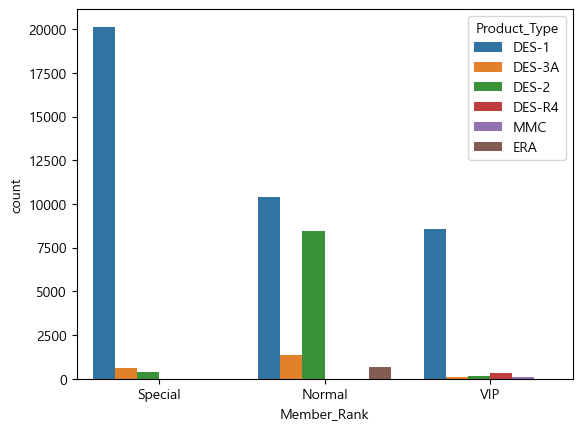

In [61]:
import seaborn as sns
sns.countplot(data=df1, x = 'Member_Rank', hue = 'Product_Type')

In [136]:
# 5-2. 고객의 등급과 제품군 간의 연관성이 있는지 가설검정을 수행
# 귀무 : 고객의 등급과 제품군 간의 연관성이 없다 (독립이다.)
# 대립 ; 고객의 등급과 제품군 간의 연관성이 있다 (연관이 있다.)
df_contingency = pd.crosstab(df1['Member_Rank'], df1['Product_Type'])
df_contingency

stats.chi2_contingency(df_contingency)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 / 대립가설 참 / 고객의 등급과 제품군 간의 연관성이 있다.

(17400.408970458084,
 0.0,
 10,
 array([[15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813],
        [16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772]]))

Product_Type,DES-1,DES-2,DES-3A,DES-R4,ERA,MMC
Member_Rank,,,,,,
Normal,10414,8478,1366,7,644,0
Special,20137,377,631,0,0,0
VIP,8582,141,84,320,0,120


In [64]:
# 귀무가설 : 압력분류와 스팀분류 항목은 서로 독립이다. (연관성이 없다)
# 대립가설 : 압력분류와 스팀분류 항목은 서로 독립이 아니다. (연관성이 있다)


(17400.408970458084,
 0.0,
 10,
 array([[15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813],
        [16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772]]))

## 6번

In [137]:
# 6. 'Member_Rank'고객 등급에서 'Special' 고객들의 특성을 파악하고자 한다.
#     - 'Datetime'계약일자를 이용하여, 가장 유입(빈도수)이 많이 발생한 '월'을 확인
#     - 2019년도 / 2020년도 각각 확인

In [138]:
df1['date'] = pd.to_datetime(df1['Datetime'])
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month

In [142]:
cond0 = (df1['Member_Rank'] == 'Special')
df1_6 = df1.loc[cond0]

df1_6['Count'] = 1
df1_6.pivot_table(index='month', values='Count', columns='year', aggfunc='sum')

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_25412\961520439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_6['Count'] = 1


year,2019,2020
month,,
1,1779.0,785.0
2,2740.0,835.0
3,2014.0,704.0
4,1496.0,553.0
5,1212.0,383.0
6,1118.0,359.0
7,1429.0,563.0
8,969.0,105.0
9,958.0,NaN


## 7번

In [143]:
# 7. 'Product_Type' 제품군 별 연도에 따른 'Total_Amount' 총금액의 증감율을 계산하시오

In [144]:
p1 = df1.pivot_table(index='Product_Type', values='Total_Amount', 
                columns='year', aggfunc='mean').reset_index()
p1

year,Product_Type,2019,2020
0,DES-1,5.355565e+06,5.381688e+06
1,DES-2,4.965625e+06,5.007293e+06
2,DES-3A,5.642707e+06,5.650558e+06
3,DES-R4,7.634888e+06,7.909875e+06
4,ERA,4.675877e+06,4.644310e+06
5,MMC,7.355526e+06,7.502300e+06


In [145]:
p1['전년대비 증감율'] = (p1[2019] - p1[2020]) / p1[2019]
p1

year,Product_Type,2019,2020,전년대비 증감율
0,DES-1,5.355565e+06,5.381688e+06,-0.004878
1,DES-2,4.965625e+06,5.007293e+06,-0.008391
2,DES-3A,5.642707e+06,5.650558e+06,-0.001391
3,DES-R4,7.634888e+06,7.909875e+06,-0.036017
4,ERA,4.675877e+06,4.644310e+06,0.006751
5,MMC,7.355526e+06,7.502300e+06,-0.019954


## 8번(강사님)

In [146]:
# 8. Credit_Rank'신용등급'을 예측하는 회귀모델을 만들고자 한다.
#     (아래의 조건에 맞춰 회귀모델을 구성하시오)
#     - X : Age / Amount_Month / Term / Gender / Product_Type
#     - Y : Credit_Rank
#     - 숫자 데이터 : 결측처리 + Standard Scaling
#     - 문자 데이터 : 결측처리 + One Hot Encoding
#     - 교차 검증 3회 / DecisonTreeRegressor / param_grid = {}
#     - r2_score(from sklearn.metrics import r2_score)
#     - r2_score(Y_train, Y_train_pred) / r2_score(Y_test, Y_test_pred)


In [159]:
# 학습데이터와 검증데이터 분할 
from sklearn.model_selection import train_test_split
# 특성공학과 학습이 수행될 파이프라인 구성 
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
# 특성공학 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#  학습알고리즘
from sklearn.tree import DecisionTreeRegressor
#  교차검증
from sklearn.model_selection import GridSearchCV
#  평가 
from sklearn.metrics import r2_score


In [164]:
# X, Y 값 설정하기
X = df1[['Age','Amount_Month','Term','Gender','Product_Type']]
Y = df1['Credit_Rank'].fillna( df1['Credit_Rank'].median() )  # fillna 결측처리

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1234)

In [166]:
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [187]:
grid_model = GridSearchCV(model_pipe, cv=3, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [168]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred  = best_model.predict(X_test)

In [170]:
r2_score(Y_train, Y_train_pred)

0.12535693861358532

In [171]:
r2_score(Y_test, Y_test_pred)

-0.05489118063188325

In [177]:
from sklearn.metrics import mean_squared_error

In [178]:
def evaluation_reg_fun1(model) :
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습 성능 (R)', r2_score(Y_train, Y_train_pred))
    print('일반화 성능 (R)', r2_score(Y_test, Y_test_pred))
    print('학습 성능 (MSE)', mean_squared_error(Y_train, Y_train_pred))
    print('일반화 성능 (MSE)', mean_squared_error(Y_test, Y_test_pred))

In [179]:
evaluation_reg_fun1(best_model)

학습 성능 (R) 0.12535693861358532
일반화 성능 (R) -0.05489118063188325
학습 성능 (MSE) 3.5997204068390385
일반화 성능 (MSE) 4.219545408174834


## 8번

In [73]:
# 결측값을 제거 한 뒤 스케일링 실시
df1_clean = df1.dropna()

In [74]:
# X, Y 값 설정하기
X = df1_clean[['Age', 'Amount_Month', 'Term', 'Gender', 'Product_Type']]
Y = df1_clean['Credit_Rank'].fillna('mean')     # Y값에 결측값이 존재하면 모델을 훈련할 수 없다.

In [75]:
# 학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=1234)

In [76]:
# 결측값을 대치
from sklearn.impute import SimpleImputer

# 스케일 & 인코딩
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 파이프라인 구축 (특성공학 + 학습)
from sklearn.pipeline import make_pipeline

# 두 파이프를 병합
from sklearn.compose import make_column_transformer

In [77]:
#     - 숫자 데이터 : 결측처리 + Standard Scaling
# numeric_pipe 생성
numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                            StandardScaler())
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [78]:
#     - 문자 데이터 : 결측처리 + One Hot Encoding
# category_pipe 생성
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder())
category_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder())])

In [79]:
# 숫자는 숫자끼리 문자는 문자끼리 처리가 되도록 파이프를 구성
numeric_list = X.describe().columns.to_list()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            ,(category_pipe, category_list))
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Amount_Month', 'Term']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Gender', 'Product_Type'])])

In [80]:
# 학습알고리즘 호출
from sklearn.tree import DecisionTreeRegressor

In [81]:
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [82]:
# GridSearch : 하이퍼 파라미터 튜닝
# CV (Cross Validation)
from sklearn.model_selection import GridSearchCV

In [83]:
#     - 교차 검증 3회 / param_grid = {}
grid_model = GridSearchCV(model_pipe
                        , cv=3
                        , param_grid = {}
                        , scoring='f1'
                        , n_jobs = -1)  # n_jobs에 -1은 cpu의 스레드를 모두 사용하겠다는 의미이다.
grid_model.fit(X_train, Y_train)



c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Amount_Month',
                                                                          'Term']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender',
                                                                          'Product_Type'])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1, param_grid={}, scoring='f1')

In [84]:
#     - r2_score(from sklearn.metrics import r2_score)
#     - r2_score(Y_train, Y_train_pred) / r2_score(Y_test, Y_test_pred)

Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_train_pred)
r2_score(Y_test, Y_test_pred)

-0.07788627241991297

## 9번

In [180]:
# 9. 'Product_Type'별 계약건수 대비 총금액(Total_Amount)을 나눈 값을 계산하시오

In [186]:
df1['count'] = 1
p1 = df1.pivot_table(index='Product_Type', values=['Total_Amount','count'], aggfunc='sum')
p1['mean'] = p1['Total_Amount'] / p1['count']
p1


,Total_Amount,count,mean
Product_Type,,,
DES-1,209786169096,39133,5.360851e+06
DES-2,44744720760,8996,4.973846e+06
DES-3A,11745786960,2081,5.644299e+06
DES-R4,2514207600,327,7.688708e+06
ERA,3007508400,644,4.670044e+06
MMC,886626000,120,7.388550e+06
